<a href="https://colab.research.google.com/github/HUB24090013/STP-AIML-Lab-and-Projects/blob/main/AIML_Module_4_Lab_1_Perceptron_and_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Training Program on AIML**
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.

In [7]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [8]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [9]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [10]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

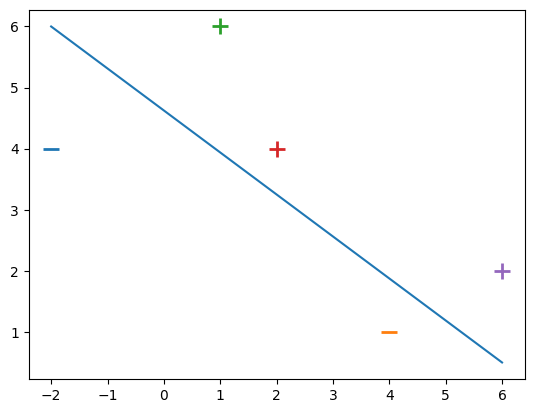

In [11]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

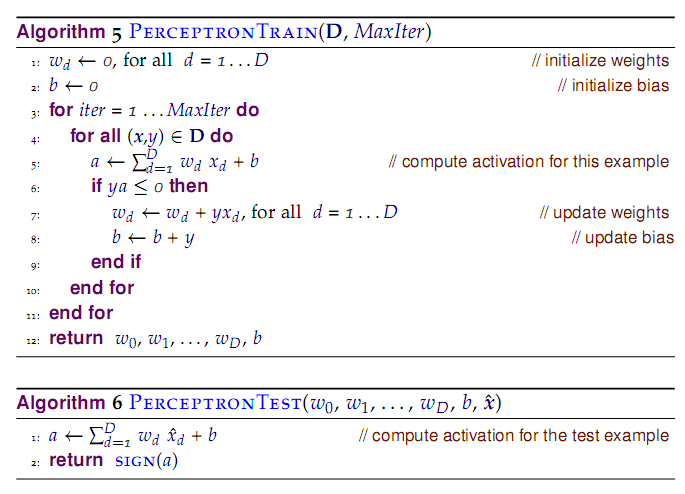

The algorithm is shown in the above image.

In [12]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [13]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

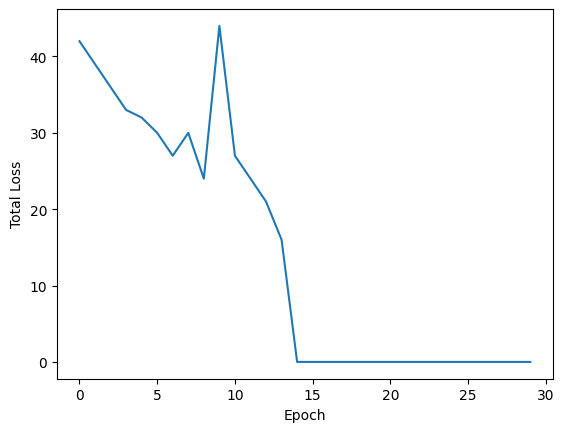

In [14]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

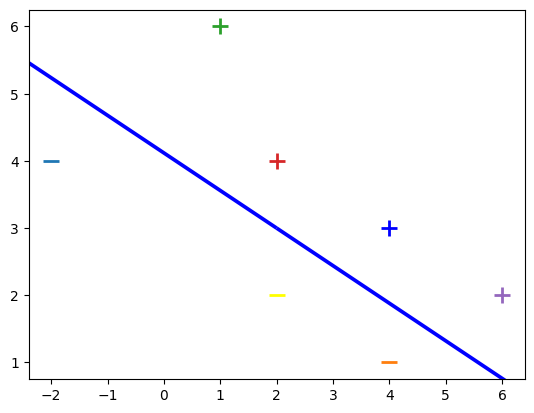

In [15]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



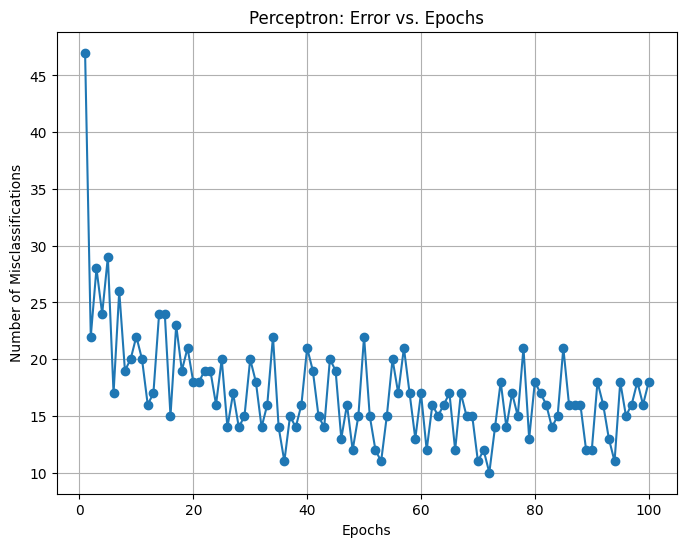

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Banknote dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
columns = ["variance", "skewness", "curtosis", "entropy", "class"]
data = pd.read_csv(url, header=None, names=columns)

# Split into features and labels
X = data[["variance", "skewness", "curtosis", "entropy"]].values
y = data["class"].values

# Convert labels to +1 and -1 (for Perceptron compatibility)
y = np.where(y == 1, 1, -1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Perceptron implementation
class Perceptron:
    def __init__(self, learning_rate=0.1, max_epochs=1000):
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.errors = []

        for epoch in range(self.max_epochs):
            errors = 0
            for i, x_i in enumerate(X):
                # Perceptron update rule
                update = self.learning_rate * y[i] if y[i] * (np.dot(x_i, self.weights) + self.bias) <= 0 else 0
                self.weights += update * x_i
                self.bias += update
                errors += int(update != 0)
            self.errors.append(errors)
            # Stop if no errors in the epoch
            if errors == 0:
                break

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, -1)


# Train the Perceptron
perceptron = Perceptron(learning_rate=0.1, max_epochs=100)
perceptron.fit(X_train, y_train)

# Plot the error vs. epochs
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(perceptron.errors) + 1), perceptron.errors, marker='o')
plt.title("Perceptron: Error vs. Epochs")
plt.xlabel("Epochs")
plt.ylabel("Number of Misclassifications")
plt.grid()
plt.show()


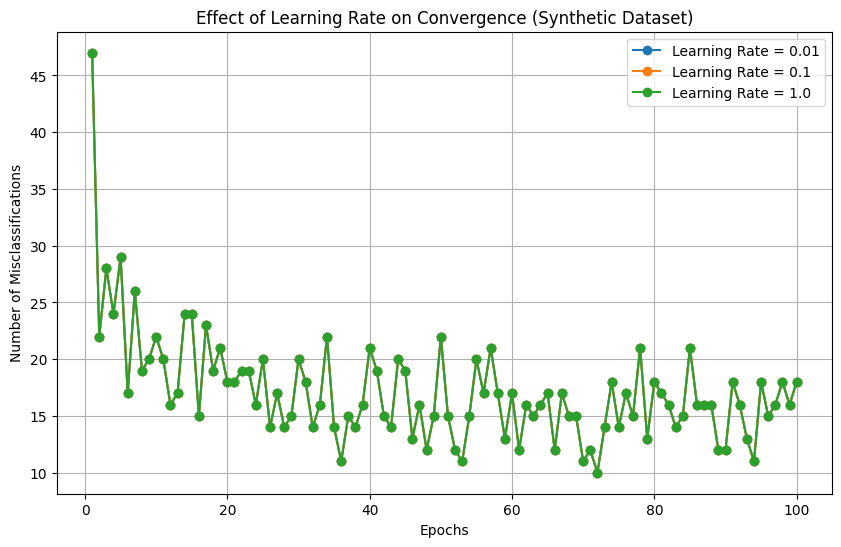

In [17]:
# Define different learning rates to test
learning_rates = [0.01, 0.1, 1.0]

# Store the results
results = {}

# Train the Perceptron for each learning rate
for lr in learning_rates:
    perceptron = Perceptron(learning_rate=lr, max_epochs=100)
    perceptron.fit(X_train, y_train)
    results[lr] = perceptron.errors

# Plot the results
plt.figure(figsize=(10, 6))
for lr, errors in results.items():
    plt.plot(range(1, len(errors) + 1), errors, marker='o', label=f"Learning Rate = {lr}")

plt.title("Effect of Learning Rate on Convergence (Synthetic Dataset)")
plt.xlabel("Epochs")
plt.ylabel("Number of Misclassifications")
plt.legend()
plt.grid()
plt.show()


What is a Perceptron?
The Perceptron is a type of linear classifier that works by finding a hyperplane to separate classes. It iteratively updates the weights based on misclassifications, adjusting them towards the correct decision boundary. However, the Perceptron algorithm assumes that the data is linearly separable (i.e., a straight line or hyperplane can separate the classes).

If the data is not linearly separable, the Perceptron will not converge. It will keep adjusting the weights forever or fail to settle on an optimal boundary.
TOY DATASET
x1  x2  y(class)
0   0   -1
0   1    +1
1   0    +1
1    1   -1

Model Coefficients: [[0. 0.]]
Model Intercept: [0.]
Predictions: [-1 -1 -1 -1]
Accuracy: 0.5


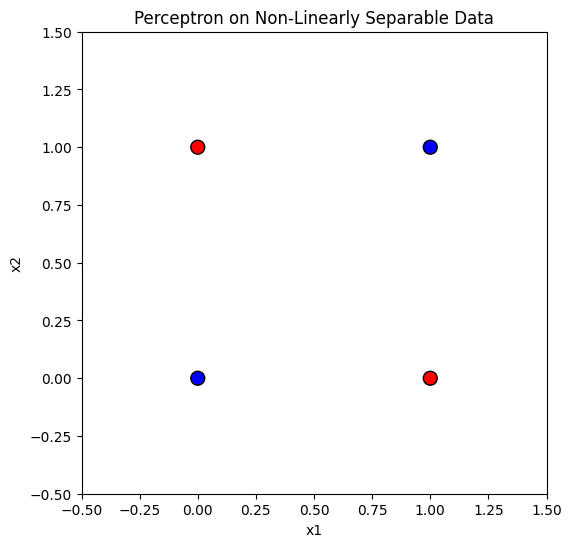

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Define the non-linearly separable dataset
X = np.array([[0, 0],  # Point 1
              [0, 1],  # Point 2
              [1, 0],  # Point 3
              [1, 1]]) # Point 4

y = np.array([-1, 1, 1, -1])  # Labels corresponding to the points

# Initialize and train the Perceptron model
perceptron = Perceptron(max_iter=100, tol=1e-3)  # max_iter to limit iterations
perceptron.fit(X, y)

# Predictions
y_pred = perceptron.predict(X)

# Print model coefficients and predictions
print("Model Coefficients:", perceptron.coef_)
print("Model Intercept:", perceptron.intercept_)
print("Predictions:", y_pred)
print("Accuracy:", accuracy_score(y, y_pred))

# Plot the dataset and decision boundary
plt.figure(figsize=(6, 6))

# Plot points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=100, edgecolors='k')

# Plot decision boundary
# Equation of line: w1*x1 + w2*x2 + b = 0 => x2 = (-w1*x1 - b) / w2
x_min, x_max = -0.5, 1.5
y_min, y_max = -0.5, 1.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

plt.title('Perceptron on Non-Linearly Separable Data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim([x_min, x_max])
plt.ylim([y_min, y_max])
plt.show()


Step-by-Step Observations
Initialization: We begin with random weights (e.g., w = [0, 0] for simplicity) and a bias (e.g., b = 0). The learning rate is usually set to a small value, like 0.1.

First iteration:

Start with the first data point (x = [0, 0], y = -1). The prediction is:
output=w 1⋅x 1+w 2⋅x 2+b
In this case, with initial weights w = [0, 0], the output is 0, which is misclassified. The Perceptron will update the weights and bias to reduce the error:
w 1=w 1−learning rate⋅y⋅x 1
w 2=w 2−learning rate⋅y⋅x 2
b=b−learning rate⋅y
After this update, the weights might change slightly.
Subsequent iterations:

As the algorithm continues through the other data points (x = [0, 1], [1, 0], and [1, 1]), it adjusts the weights each time it misclassifies a point.
In a non-linearly separable dataset, there will be repeated misclassifications, and the weights will keep updating.
Non-Convergence:

The perceptron will not converge on a solution because no single linear boundary can separate the two classes.
The algorithm may continue to oscillate, constantly changing the weights without ever finding a perfect separation.
Conclusion:

When applying the Perceptron to a non-linearly separable dataset, the algorithm will fail to converge to a solution. It will keep iterating, but it will never find a decision boundary that perfectly classifies all points.
Key Observations:
Misclassification: The Perceptron algorithm will frequently misclassify points in the dataset.
No Convergence: The weights will keep updating without settling into a final, correct configuration.
Limitations: The Perceptron cannot handle non-linearly separable data. It will only work correctly if the data is linearly separable.
Visualization
If you were to plot the points and try to draw a line that separates them, you would find that it's impossible to draw such a line. The Perceptron struggles because it relies on linear separability for convergence.

In [19]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [20]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


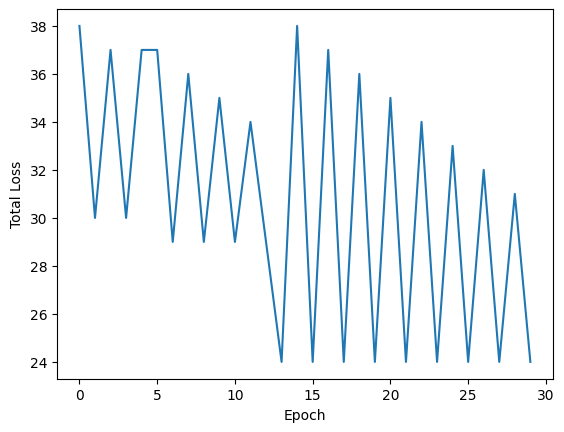

In [21]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

## **Additional Critical Thinking Questions**

1. Consider the following dataset where x = (x1, x2) ∈ {0, 1}× {0, 1}, y ∈ {−, +}. Note that this dataset is corresponding to the boolean function “AND” over the 2-bit binary input.

  Suppose we are training a Perceptron to learn on this dataset and we initialize w0 = 0 and b0 = 0.

  Please i) answer if this dataset is learnable by Perceptron, and ii) if so, write down the weights update procedure for each iteration; if not, explain why.


2. Extending AND to any boolean functions over a 2-bit binary input, where we have (2^2)^2 = 16 possible distinct boolean functions in total, among which how many of them can be learnable by a Perceptron?

  Please also write down the truth table(s) of the boolean functions that are not learnable, if there are any.

Yes, this dataset is learnable by a Perceptron. The boolean "AND" function is linearly separable, which means that there exists a hyperplane (in this case, a straight line) that can separate the points corresponding to the classes y=− and y=+. Since the Perceptron algorithm can learn linearly separable datasets, it will successfully converge to the correct weights for this dataset.

 Weights Update Procedure
The Perceptron learning rule updates the weights

w=(w 1,w 2) and bias
b as follows:
w←w+η⋅y⋅x
b←b+η⋅y
Here:


η is the learning rate (we can assume η=1 for simplicity).

x is the input vector
(x 1,x 2).
y is the target label (+1 or -1).
Iteration 1: Start with

w=(0,0),

b=0.
For each training example:


x=(0,0),y=−1:

z=w⋅x+b=0. Predicted

y^=+1.
Update:

w←w+y⋅x=(0,0)+(−1)⋅(0,0)=(0,0)


b←b+y=0+(−1)=−1

x=(0,1),y=−1:

z=w⋅x+b=−1. Predicted
y^=−1. No update.
x=(1,0),y=−1:
z=w⋅x+b=−1. Predicted
y^=−1. No update.
x=(1,1),y=+1:
z=w⋅x+b=−1. Predicted
y^=−1.
Update:
w←w+y⋅x=(0,0)+(+1)⋅(1,1)=(1,1)

b←b+y=−1+(+1)=0
Updated weights:

w=(1,1),

b=0.

Iteration 2: Start with
w=(1,1),

b=0.
For each training example:

x=(0,0),y=−1:
z=w⋅x+b=0. Predicted
y^=+1.
Update:

w←w+y⋅x=(1,1)+(−1)⋅(0,0)=(1,1)
b←b+y=0+(−1)=−1

x=(0,1),y=−1:
z=w⋅x+b=0.
Predicted
y^=+1.
Update:

w←w+y⋅x=(1,1)+(−1)⋅(0,1)=(1,0)

b←b+y=−1+(−1)=−2

x=(1,0),y=−1:

z=w⋅x+b=−1. Predicted

y^​=−1. No update.

x=(1,1),y=+1:

z=w⋅x+b=−1. Predicted

y^=−1.
Update:

w←w+y⋅x=(1,0)+(+1)⋅(1,1)=(2,1)
b←b+y=−2+(+1)=−1
Updated weights:
w=(2,1),
b=−1.

Repeat Until Convergence:

The updates will eventually lead to a hyperplane that separates the classes. For this dataset, the Perceptron converges in a few iterations with weights
w=(2,1),
b=−1, or another equivalent separating hyperplane.


The Perceptron algorithm can only learn linearly separable boolean functions. Among the
2^2^2 = 16 possible boolean functions over a 2-bit binary input, only those functions that can be separated into two classes ( y=+1 and y=−1) by a single hyperplane (straight line in this case) are learnable.

Breakdown of Linearly Separable and Non-Linearly Separable Functions
There are
16
16 boolean functions.
A boolean function is represented by a truth table mapping all possible inputs
(x
1
​
 ,x
2
​
 ) to corresponding outputs
y.
Functions that are linearly separable are those where the positive and negative outputs can be separated by a hyperplane in the 2D space defined by

(x
1
​
 ,x
2
​
 ).
Using geometric reasoning and symmetry of the boolean functions, 6 functions are linearly separable, and 10 functions are not linearly separable.

Truth Tables for Non-Linearly Separable Functions
The remaining
10
10 functions are not linearly separable. Examples include:

XOR
x1  x2  y
0   0   -1
0   1    +1
1   0    +1
1    1   -1

XNOR
x1  x2  y
0   0   +1
0   1    -1
1   0    -1
1    1   +1





The other 8 non-linearly separable functions include various combinations of inputs that cannot be separated by a single straight line. These include flipped or negated versions of XOR, XNOR, and other complex decision boundaries.

